<a href="https://colab.research.google.com/github/hspgit/IR-Project-Text-summarization/blob/main/new_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json

target_summaries_url = "https://raw.githubusercontent.com/hspgit/IR-Project-Text-summarization/main/target.json"

# Fetch the JSON data from the URL
response = requests.get(target_summaries_url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Load the JSON data into a Python dictionary
target_summaries = json.loads(response.text)

# Now you can access the data within the target_summaries dictionary
print(target_summaries)  # Print the loaded JSON data
print(type(target_summaries))

In [ ]:
news_urls_json_url = "https://raw.githubusercontent.com/hspgit/IR-Project-Text-summarization/main/news_urls.json"
response = requests.get(news_urls_json_url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Load the JSON data into a Python dictionary
news_urls = json.loads(response.text)
print(news_urls)
print(type(news_urls))

In [ ]:
article_texts_json_url = "https://raw.githubusercontent.com/hspgit/IR-Project-Text-summarization/main/article_texts.json"
response = requests.get(article_texts_json_url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Load the JSON data into a Python dictionary
article_texts = json.loads(response.text)
print(article_texts)
print(type(article_texts))

In [1]:
!pip install rouge

In [6]:
import requests
import json
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

# Download necessary NLTK resources
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab')

# Load the data
target_summaries_url = "https://raw.githubusercontent.com/hspgit/IR-Project-Text-summarization/main/target.json"
article_texts_json_url = "https://raw.githubusercontent.com/hspgit/IR-Project-Text-summarization/main/article_texts.json"

# Fetch the target summaries
response = requests.get(target_summaries_url)
response.raise_for_status()
target_data = json.loads(response.text)
target_summaries = {item['query']: item['summary'] for item in target_data}

# Fetch the article texts
response = requests.get(article_texts_json_url)
response.raise_for_status()
article_texts = json.loads(response.text)

# Function to extract first 150 words from text
def extract_first_150_words(text):
    """Extract the first 150 words from an article."""
    if not text.strip():
        return ""
    words = word_tokenize(text)
    first_150 = ' '.join(words[:150])
    return first_150

# Generate summaries from the first 150 words of the first article for each query
generated_summaries = {}
for query, articles in article_texts.items():
    if articles and len(articles) > 0:
        # Find the first article with actual text
        article_text = ""
        for article in articles:
            if isinstance(article, dict) and 'text' in article and article['text']:
                article_text = article['text']
                break

        if article_text:
            generated_summaries[query] = extract_first_150_words(article_text)
        else:
            print(f"No valid text found for query: {query}")
    else:
        print(f"No articles found for query: {query}")

# Initialize Rouge for evaluation
rouge = Rouge()

# Evaluate generated summaries against target summaries
results = {}
all_scores = {'rouge-1': {'f': 0, 'p': 0, 'r': 0},
              'rouge-2': {'f': 0, 'p': 0, 'r': 0},
              'rouge-l': {'f': 0, 'p': 0, 'r': 0}}
count = 0

print("Evaluating summaries...")
for query, target_summary in target_summaries.items():
    if query in generated_summaries and generated_summaries[query]:
        hypothesis = generated_summaries[query]
        reference = target_summary

        try:
            # Calculate ROUGE scores
            scores = rouge.get_scores(hypothesis, reference)[0]
            results[query] = scores

            # Accumulate scores for average
            for metric in all_scores:
                for key in all_scores[metric]:
                    all_scores[metric][key] += scores[metric][key]
            count += 1

            print(f"Query: {query}")
            print(f"ROUGE-1 F1: {scores['rouge-1']['f']:.4f}")
            print(f"ROUGE-2 F1: {scores['rouge-2']['f']:.4f}")
            print(f"ROUGE-L F1: {scores['rouge-l']['f']:.4f}")
            print("-" * 50)
        except Exception as e:
            print(f"Error evaluating query '{query}': {str(e)}")
    else:
        print(f"No summary generated for query: {query}")

# Calculate and display average scores
if count > 0:
    for metric in all_scores:
        for key in all_scores[metric]:
            all_scores[metric][key] /= count

print("\nAverage ROUGE Scores:")
print(f"ROUGE-1 F1: {all_scores['rouge-1']['f']:.4f}")
print(f"ROUGE-2 F1: {all_scores['rouge-2']['f']:.4f}")
print(f"ROUGE-L F1: {all_scores['rouge-l']['f']:.4f}")

# Display examples of summaries for comparison
print("\nExample Comparisons:")
for i, query in enumerate(list(generated_summaries.keys())[:3]):
    if query in target_summaries:
        print(f"\nQuery: {query}")
        print(f"Generated Summary (first 150 words): {generated_summaries[query][:200]}...")
        print(f"Target Summary: {target_summaries[query][:200]}...")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Evaluating summaries...
Query: Global economic outlook
ROUGE-1 F1: 0.0853
ROUGE-2 F1: 0.0000
ROUGE-L F1: 0.0853
--------------------------------------------------
Query: US presidential election updates
ROUGE-1 F1: 0.1567
ROUGE-2 F1: 0.0071
ROUGE-L F1: 0.1475
--------------------------------------------------
Query: Climate change and extreme weather events
ROUGE-1 F1: 0.1560
ROUGE-2 F1: 0.0145
ROUGE-L F1: 0.1284
--------------------------------------------------
Query: Advances in artificial intelligence
ROUGE-1 F1: 0.1159
ROUGE-2 F1: 0.0073
ROUGE-L F1: 0.0966
--------------------------------------------------
Query: Major tech company earnings reports
ROUGE-1 F1: 0.1429
ROUGE-2 F1: 0.0071
ROUGE-L F1: 0.1333
--------------------------------------------------
Query: International conflict and peace negotiations
ROUGE-1 F1: 0.1972
ROUGE-2 F1: 0.0070
ROUGE-L F1: 0.1690
--------------------------------------------------
Query: COVID-19 pandemic developments
ROUGE-1 F1: 0.1869
ROUGE-2 F1: 

In [7]:
!pip install matplotlib seaborn pandas

<ipython-input-8-cb7b37a524cf>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=avg_df, palette='viridis')


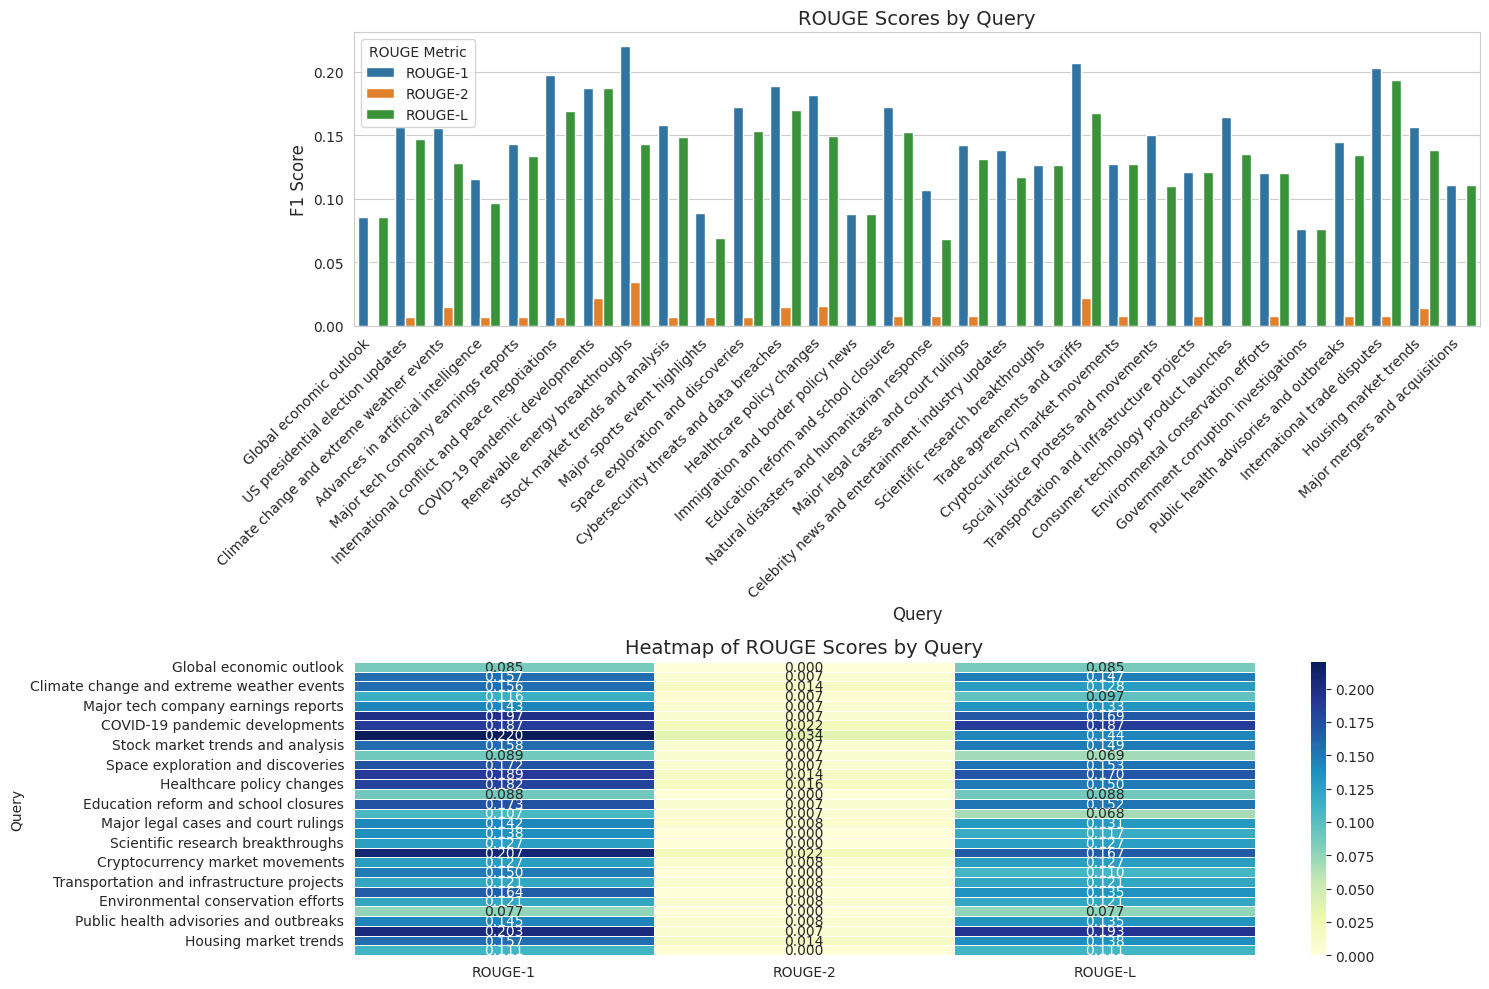

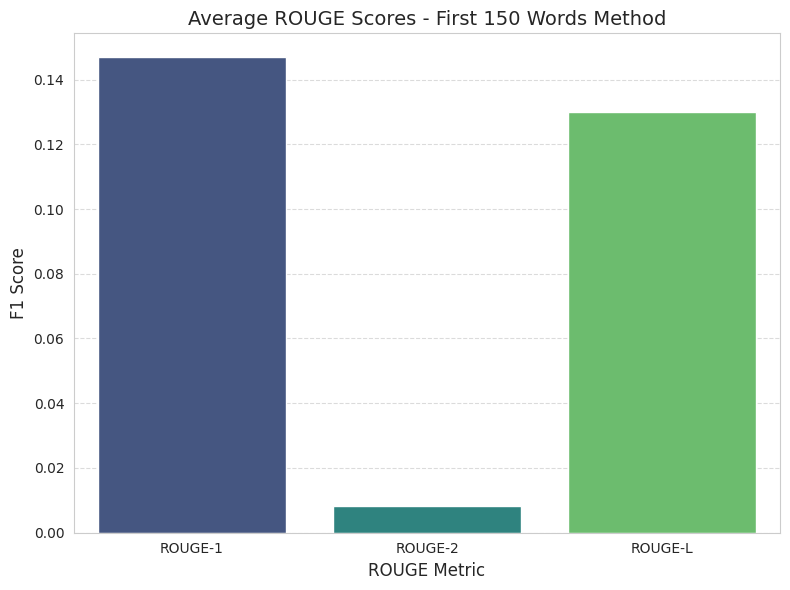

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# After calculating all the ROUGE scores and before printing the average scores, add this visualization code:

# Create a DataFrame to hold the results for visualization
df_scores = []
for query, score in results.items():
    df_scores.append({
        'Query': query,
        'ROUGE-1': score['rouge-1']['f'],
        'ROUGE-2': score['rouge-2']['f'],
        'ROUGE-L': score['rouge-l']['f']
    })

df = pd.DataFrame(df_scores)

# Set the style for the plots
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))

# 1. Bar chart comparing ROUGE scores across queries
plt.subplot(2, 1, 1)
df_melted = df.melt(id_vars=['Query'], var_name='Metric', value_name='Score')
sns.barplot(x='Query', y='Score', hue='Metric', data=df_melted)
plt.title('ROUGE Scores by Query', fontsize=14)
plt.xlabel('Query', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='ROUGE Metric')
plt.tight_layout()

# 2. Heatmap showing ROUGE scores
plt.subplot(2, 1, 2)
heatmap_data = df.set_index('Query')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=.5)
plt.title('Heatmap of ROUGE Scores by Query', fontsize=14)
plt.tight_layout()

# Show the average scores as a standalone bar chart
plt.figure(figsize=(8, 6))
avg_scores = {
    'ROUGE-1': all_scores['rouge-1']['f'],
    'ROUGE-2': all_scores['rouge-2']['f'],
    'ROUGE-L': all_scores['rouge-l']['f']
}
avg_df = pd.DataFrame(list(avg_scores.items()), columns=['Metric', 'Score'])
sns.barplot(x='Metric', y='Score', data=avg_df, palette='viridis')
plt.title('Average ROUGE Scores - First 150 Words Method', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('ROUGE Metric', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figures
plt.savefig('rouge_scores_visualization.png')
plt.show()